In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# Load Data

In [2]:
company = 'FB'

start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

data = web.DataReader(company, 'yahoo', start, end)

# Prepare Data

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [4]:
prediction_days = 60

xtrain = []
ytrain = []

for x in range(prediction_days, len(scaled_data)):
    xtrain.append(scaled_data[x-prediction_days :x,0])
    ytrain.append(scaled_data[x,0])
    
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))

# Build The Model

In [5]:
model = Sequential()

model.add(LSTM(units=60,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(xtrain, ytrain, epochs=50, batch_size=42)

Epoch 1/50
45/45 [==============================] - 6s 46ms/step - loss: 0.0340
Epoch 2/50
45/45 [==============================] - 2s 44ms/step - loss: 0.0040
Epoch 3/50
45/45 [==============================] - 2s 43ms/step - loss: 0.0032
Epoch 4/50
45/45 [==============================] - 2s 43ms/step - loss: 0.0030
Epoch 5/50
45/45 [==============================] - 2s 43ms/step - loss: 0.0029
Epoch 6/50
45/45 [==============================] - 2s 43ms/step - loss: 0.0027
Epoch 7/50
45/45 [==============================] - 2s 42ms/step - loss: 0.0034
Epoch 8/50
45/45 [==============================] - 2s 43ms/step - loss: 0.0028
Epoch 9/50
45/45 [==============================] - 2s 42ms/step - loss: 0.0026
Epoch 10/50
45/45 [==============================] - 2s 44ms/step - loss: 0.0024
Epoch 11/50
45/45 [==============================] - 2s 47ms/step - loss: 0.0027
Epoch 12/50
45/45 [==============================] - 2s 48ms/step - loss: 0.0024
Epoch 13/50
45/45 [==================

# Testing Model accuracy

In [6]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_data = pd.concat((data['Close'], test_data['Close']))


In [7]:
model_inputs = total_data[len(total_data) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

# make prediction on test data

In [9]:
xtest = []

for x in range(prediction_days,len(model_inputs)):
    xtest.append(model_inputs[x-prediction_days:x,0])
    
xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1],1))

predicted_prices = model.predict(xtest)
predicted_prices = scaler.inverse_transform(predicted_prices)

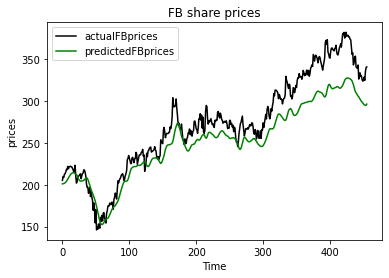

In [10]:
plt.plot(actual_prices, color = 'black',label = f'actual{company}prices')
plt.plot(predicted_prices, color = 'green', label = f'predicted{company}prices')
plt.title(f'{company} share prices')
plt.xlabel('Time')
plt.ylabel('prices')
plt.legend()
plt.show()